In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df_mlp = pd.read_csv("df_bpine_bert.csv")

In [3]:
df_mlp

,index,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,X..Beta-Pinene
0,2,0.127047,0.111979,0.549845,0.036660,0.026879,-0.309649,0.654963,0.205110,-0.097057,...,0.146141,0.174652,-0.146565,0.217158,-0.712819,0.046792,-0.744437,-0.214183,-0.707376,0.016667
1,9,0.116446,0.085956,0.521495,0.045328,-0.007026,-0.271656,0.550318,0.184941,-0.034033,...,0.154121,0.181222,-0.062230,0.219977,-0.770134,0.037119,-0.628770,-0.174542,-0.619764,0.016667
2,12,0.145553,0.092642,0.594356,0.082372,0.070935,-0.329163,0.570402,0.198113,-0.011617,...,0.134862,0.157927,-0.132747,0.216044,-0.736114,0.027545,-0.658038,-0.140654,-0.657726,0.016667
3,13,0.228885,0.109906,0.588899,0.070310,0.026625,-0.370848,0.754401,0.215168,-0.129841,...,0.165573,0.127164,-0.140357,0.235097,-0.730830,0.103537,-0.790641,-0.174511,-0.783329,0.016667
4,17,0.131370,0.115135,0.579688,0.069590,0.012138,-0.392340,0.780495,0.189015,-0.031244,...,0.139278,0.109309,-0.137823,0.190875,-0.764594,0.082637,-0.759743,-0.186167,-0.745043,0.016667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,42965,0.206688,0.119958,0.570615,0.069948,0.053100,-0.416459,0.784668,0.089139,-0.113613,...,0.158980,0.153869,-0.091632,0.334816,-0.746073,0.152503,-0.820483,-0.203148,-0.826904,0.003333
29996,42968,0.217911,0.117410,0.573906,0.071714,0.029285,-0.394428,0.753552,0.142011,-0.127539,...,0.185978,0.138601,-0.149383,0.296679,-0.768776,0.135224,-0.782056,-0.181125,-0.813919,0.003333
29997,42972,0.102736,0.135983,0.550969,-0.014671,0.015193,-0.269029,0.679146,0.145063,-0.059002,...,0.252791,0.156139,-0.121033,0.199727,-0.782018,-0.003939,-0.664979,-0.150894,-0.634808,0.003333
29998,42972,0.102736,0.135983,0.550969,-0.014671,0.015193,-0.269029,0.679146,0.145063,-0.059002,...,0.252791,0.156139,-0.121033,0.199727,-0.782018,-0.003939,-0.664979,-0.150894,-0.634808,0.003333


In [4]:
X = df_mlp.drop(['index', 'X..Beta-Pinene'], axis = 1)
y = df_mlp[['X..Beta-Pinene']]

Plotting histograms on target variable

<AxesSubplot:ylabel='Count'>

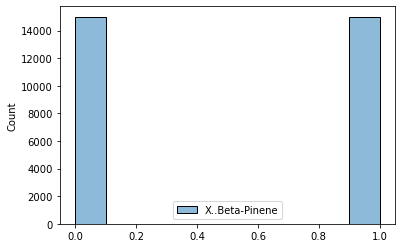

In [5]:
sns.histplot(y, bins = 10)

PCA

In [6]:
pca = PCA()
pca_comps = pca.fit_transform(X)

In [7]:
pca_comps

array([[ 1.24290055e+00, -7.79251561e-01,  1.78163065e-01, ...,
        -1.92826076e-03, -2.36439279e-03, -1.40974178e-09],
       [ 2.20154695e+00, -2.89760847e-01, -5.31947330e-02, ...,
         9.26893592e-03, -2.34699827e-03, -2.98604748e-08],
       [ 2.67476307e+00, -1.36923026e-01,  3.96833326e-03, ...,
         4.88445780e-03, -7.23670940e-04, -2.09721215e-08],
       ...,
       [ 1.66370870e+00, -4.87200329e-01, -5.66468438e-01, ...,
         1.01357834e-03, -1.74490368e-03, -1.53792556e-08],
       [ 1.66370870e+00, -4.87200329e-01, -5.66468438e-01, ...,
         1.01357834e-03, -1.74490368e-03, -1.53792556e-08],
       [-1.57866028e+00,  3.05149781e-01, -2.47875177e-01, ...,
         2.60187815e-03, -5.47899312e-04, -1.87897973e-08]])

In [8]:
type(pca_comps)

numpy.ndarray

In [9]:
explained_variance = pca.explained_variance_ratio_

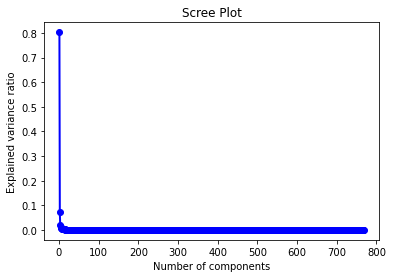

In [10]:
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'bo-', linewidth=2)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Scree Plot')
plt.show()

In [11]:
# Calculate the second derivative of the explained variance ratio curve
second_der = np.diff(explained_variance, 2)

# Find the index of the maximum value of the second derivative
elbow_index = np.argmax(second_der) + 1

# The optimal number of components is the index of the elbow point
n_components_optimal = elbow_index

In [12]:
n_components_optimal

1

In [13]:
X_reduced = pca.transform(X)[:, :n_components_optimal]

In [14]:
X_reduced

array([[ 1.24290055],
       [ 2.20154695],
       [ 2.67476307],
       ...,
       [ 1.6637087 ],
       [ 1.6637087 ],
       [-1.57866028]])

train test split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, random_state=1, test_size=0.2)

In [16]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

MLP (before feature selection and hyperparameter tuning)

In [17]:
mlpreg = MLPRegressor(random_state=1, early_stopping=True)
mlpreg.fit(X_train1, y_train1)
y_pred_mlp = mlpreg.predict(X_val)
y_pred_mlp_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
mean_absolute_error(y_val, y_pred_mlp)

0.4924276876844925

In [19]:
mean_squared_error(y_val, y_pred_mlp)

0.24343532854269537

In [20]:
mean_squared_error(y_val, y_pred_mlp, squared = False)

0.4933916583635108

In [21]:
#train
r2_score(y_train1, y_pred_mlp_r2)

0.009965199399129654

In [22]:
#val
r2_score(y_val, y_pred_mlp)

0.012084141901795298

Hyperparameter tuning (MLP)

In [23]:
parameters = {'hidden_layer_sizes': [(100,), (50, 50, 50), (50, 100, 50)],
              'activation': ['tanh', 'relu'], #only tanh and relu
              'max_iter': [200, 500, 1000]
              }

In [24]:
rscv = RandomizedSearchCV(mlpreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs=-1)

In [25]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_netwo

RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(early_stopping=True, random_state=1),
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 50),
                                                               (50, 100, 50)],
                                        'max_iter': [200, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [26]:
rscv.best_params_

{'max_iter': 1000, 'hidden_layer_sizes': (50, 100, 50), 'activation': 'relu'}

In [27]:
joblib.dump(rscv, "rscv_mlp_bert_bpine.pkl")
joblib.dump(rscv.best_params_, "rscv_mlp_bert_best_params_bpine.pkl")

['rscv_mlp_bert_best_params_bpine.pkl']

kNN (after hyperparameter tuning)

In [28]:
mlpreg_ht = MLPRegressor(random_state=1, max_iter=1000, activation = 'relu', hidden_layer_sizes= (50,100,50), early_stopping=True)
mlpreg_ht.fit(X_train1, y_train1)
y_pred_mlp_ht = mlpreg_ht.predict(X_val)
y_pred_mlp_r2_ht = mlpreg_ht.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
mean_absolute_error(y_val, y_pred_mlp_ht)

0.4806990231226702

In [30]:
mean_squared_error(y_val, y_pred_mlp_ht)

0.2386295634158707

In [31]:
mean_squared_error(y_val, y_pred_mlp_ht, squared = False)

0.4884972501620359

In [32]:
#train
r2_score(y_train1, y_pred_mlp_r2_ht)

0.03375658793135572

In [33]:
#val
r2_score(y_val, y_pred_mlp_ht)

0.03158702838711802

Predicting on the test set (MLP)

In [34]:
y_pred_mlp_test = mlpreg_ht.predict(X_test)

In [35]:
joblib.dump(y_pred_mlp_test, "y_pred_mlp_test_bert_bpine.pkl")
joblib.dump(y_test, "y_test_mlp_bert_bpine.pkl")

['y_test_mlp_bert_bpine.pkl']

In [36]:
mean_absolute_error(y_test, y_pred_mlp_test)

0.48218634310193875

In [37]:
mean_squared_error(y_test, y_pred_mlp_test)

0.24021345644952474

In [38]:
mean_squared_error(y_test, y_pred_mlp_test, squared = False)

0.4901157582138374

In [39]:
r2_score(y_test, y_pred_mlp_test)

0.024879027809347476

Error analysis (kNN)

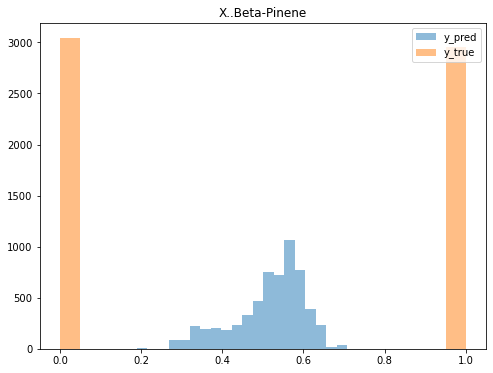

<Figure size 432x288 with 0 Axes>

In [40]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Beta-Pinene"  # specify the target variable name
ax.hist(y_pred_mlp_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_mlp_bert_bpine.png')

Pearson R

In [41]:
corr_coef, p_value = pearsonr(y_pred_mlp_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.162
P-value: 0.000


<AxesSubplot:>

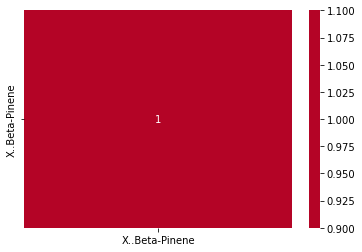

In [42]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)